In [1]:
import sys
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch.nn as nn
import lightning.pytorch as pl
from pytorch_lightning import Trainer
from lightning.pytorch.loggers import TensorBoardLogger
import tensorboard

# Get the current working directory
current_dir = os.getcwd()

# Construct the path to the root directory
root_directory = os.path.abspath(os.path.join(current_dir, '..'))

# Add the root directory to the system path
sys.path.append(root_directory)

# Verify the path addition
from helper_utils import *
from U_Net import *
import U_Net_helper_functions

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
paths_01 =  list_files_in_folder(convert_backslashes_to_forward_slashes(r'C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\PhC-C2DH-U373\01'))
paths_01_labels =  list_files_in_folder(convert_backslashes_to_forward_slashes(r'C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\PhC-C2DH-U373\01_ST'))
paths_02 =  list_files_in_folder(convert_backslashes_to_forward_slashes(r'C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\PhC-C2DH-U373\02'))
paths_02_labels =  list_files_in_folder(convert_backslashes_to_forward_slashes(r'C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\PhC-C2DH-U373\02_ST'))

In [3]:
image_paths = paths_01 + paths_02
label_paths = paths_01_labels + paths_02_labels

img 01


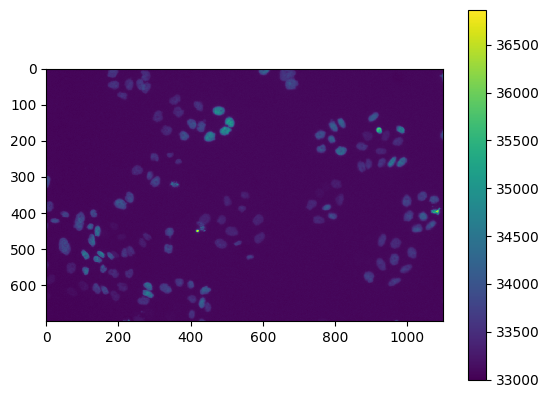

img 02


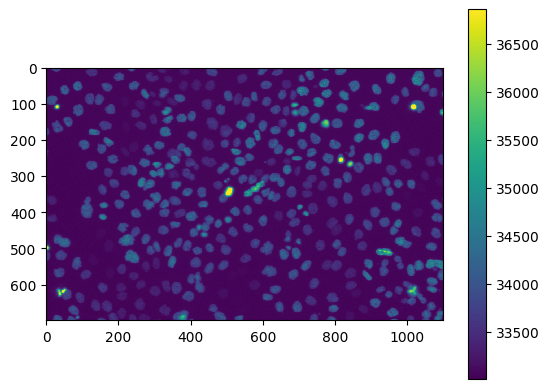

label 01


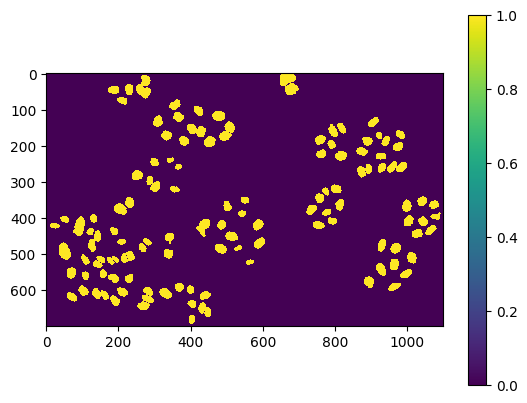

label 02


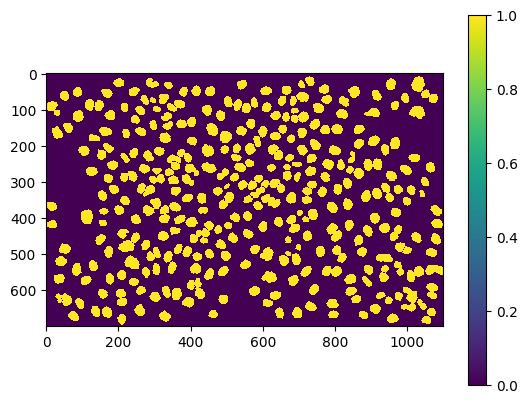

In [70]:
i = 81
image_01 = Image.open(paths_01[i])
image_array_01 = np.array(image_01)
image_02 = Image.open(paths_02[i])
image_array_02 = np.array(image_02)
label_01 = Image.open(paths_01_labels[i])
label_array_01 = np.array(label_01)
label_array_01 = np.where(label_array_01 != 0, 1, label_array_01)
label_02 = Image.open(paths_02_labels[i])
label_array_02 = np.array(label_02)
label_array_02 = np.where(label_array_02 != 0, 1, label_array_02)
print('img 01')
plot_heatmap(image_array_01)
print('img 02')
plot_heatmap(image_array_02)
print('label 01')
plot_heatmap(label_array_01)
print('label 02')
plot_heatmap(label_array_02)



In [88]:
import os
import random
from PIL import Image

def process_images(image_paths, label_paths, output_folder_image, output_folder_label, k=1):
    """
    Processes each image in image_paths by randomly cropping, rotating, and saving k times.

    Args:
        image_paths (list of str): List of paths to the input images.
        label_paths (list of str): List of paths to the input labels.
        output_folder (str): Path to the folder where processed images will be saved.
        k (int): Number of times to process each image.
    """
    if not os.path.exists(output_folder):
        raise Exception(f"{output_folder} No such file or directory") 
        # os.makedirs(output_folder)
    
    for i in range(len(image_paths)):
        image = Image.open(image_paths[i])
        label = Image.open(label_paths[i])
        image_name = os.path.basename(image_paths[i])
        label_name = os.path.basename(label_paths[i])
        for i in range(k):
            cropped_image, cropped_label = random_crop(image, label, (512, 512))
            rotated_image, rotated_label = random_rotate(cropped_image, cropped_label)


            # label_array_test = np.array(rotated_label)
            # image_array_test = np.array(rotated_image)

            # print('IMAGE TEST')
            # plot_heatmap(image_array_test)
            # print('LABEL TEST')
            # plot_heatmap(label_array_test)




            output_path_image = os.path.join(output_folder_image, f"{os.path.splitext(image_name)[0]}_{i}.tif")
            output_path_label = os.path.join(output_folder_label, f"{os.path.splitext(label_name)[0]}_{i}.tif")
            rotated_image.save(output_path_image, format='TIFF')
            rotated_label.save(output_path_label, format='TIFF')

def random_crop(image, label, size):
    """
    Randomly crops the image to the given size.

    Args:
        image (PIL.Image): The input image.
        size (tuple): The size of the crop (width, height).

    Returns:
        PIL.Image: The cropped image.
    """
    width, height = image.size
    new_width, new_height = size
    if width < new_width or height < new_height:
        raise ValueError("Crop size is larger than the image size.")
    
    left = random.randint(0, width - new_width)
    top = random.randint(0, height - new_height)
    right = left + new_width
    bottom = top + new_height

    return image.crop((left, top, right, bottom)), label.crop((left, top, right, bottom))

def random_rotate(image, label, fillcolor = 32999, fillcolor_label = 0):
    """
    Randomly rotates the image by a random angle.

    Args:
        image (PIL.Image): The input image.

    Returns:
        PIL.Image: The rotated image.
    """
    angle = random.uniform(0, 360)
    return image.rotate(angle, expand=False, fillcolor = fillcolor), label.rotate(angle, expand=False, fillcolor = fillcolor_label)

# Example usage:
# image_paths = img_paths[:2]
# label_paths = label_paths[:2]
output_folder_image = convert_backslashes_to_forward_slashes(r"C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\augmented_data_Flue_N2DL-HeLa\imgs")
output_folder_label = convert_backslashes_to_forward_slashes(r"C:\Users\Komputer\Documents\Hackaton_heidelberg\CellTrackingU-Net\data\train\augmented_data_Flue_N2DL-HeLa\labels")
process_images(image_paths, label_paths, output_folder_image, output_folder_label, k=10)


In [89]:
paths_output_folder_image =  list_files_in_folder(output_folder_image)
paths_output_folder_label =  list_files_in_folder(output_folder_label)
len(paths_output_folder_image)

920

img   (512, 512)


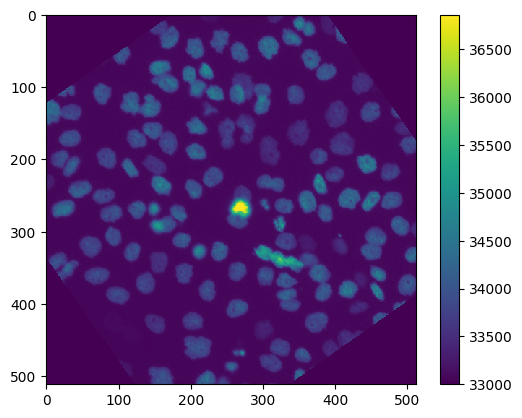

Label   (512, 512)


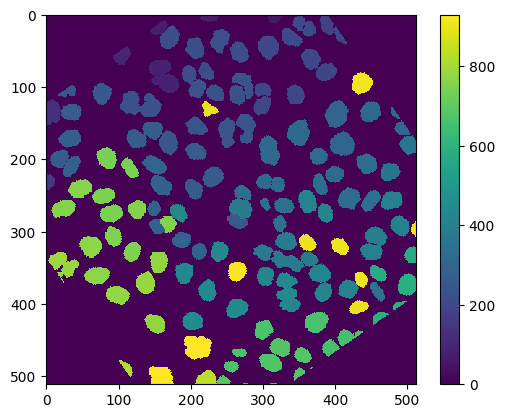

In [91]:
i = 826
image_01 = Image.open(paths_output_folder_image[i])
image_array_01 = np.array(image_01)
label_01 = Image.open(paths_output_folder_label[i])
label_array_01 = np.array(label_01)

print('img  ', image_array_01.shape)
plot_heatmap(image_array_01)
print('Label  ', label_array_01.shape)
plot_heatmap(label_array_01)

In [30]:
image_array_01.min()

32999